## 1. import each dataset, cause it's large

In [1]:
from collections import defaultdict

def build_pairs(names):
    pairs = defaultdict(dict)
    for name in names:
        if name.startswith("raw_review_"):
            cat = name.replace("raw_review_", "")
            pairs[cat]["review"] = name
        elif name.startswith("raw_meta_"):
            cat = name.replace("raw_meta_", "")
            pairs[cat]["meta"] = name
    return pairs

with open("datasets.txt", "r") as f:
    names = [line.strip() for line in f if line.strip()]

pairs = build_pairs(names)

for i, (cat, pair) in enumerate(pairs.items()):
    if i == 10: break
    print(cat, "=>", pair)


All_Beauty => {'meta': 'raw_meta_All_Beauty', 'review': 'raw_review_All_Beauty'}
Toys_and_Games => {'meta': 'raw_meta_Toys_and_Games', 'review': 'raw_review_Toys_and_Games'}
Cell_Phones_and_Accessories => {'meta': 'raw_meta_Cell_Phones_and_Accessories', 'review': 'raw_review_Cell_Phones_and_Accessories'}
Industrial_and_Scientific => {'meta': 'raw_meta_Industrial_and_Scientific', 'review': 'raw_review_Industrial_and_Scientific'}
Gift_Cards => {'meta': 'raw_meta_Gift_Cards', 'review': 'raw_review_Gift_Cards'}
Musical_Instruments => {'meta': 'raw_meta_Musical_Instruments', 'review': 'raw_review_Musical_Instruments'}
Electronics => {'meta': 'raw_meta_Electronics', 'review': 'raw_review_Electronics'}
Handmade_Products => {'meta': 'raw_meta_Handmade_Products', 'review': 'raw_review_Handmade_Products'}
Arts_Crafts_and_Sewing => {'meta': 'raw_meta_Arts_Crafts_and_Sewing', 'review': 'raw_review_Arts_Crafts_and_Sewing'}
Baby_Products => {'meta': 'raw_meta_Baby_Products', 'review': 'raw_review_Ba

In [2]:
from datasets import load_dataset

category = "CDs_and_Vinyl"
review_name = pairs[category]["review"]
meta_name = pairs[category]["meta"] 
# Load CDs_and_Vinyl reviews
print(f"Loading {category} reviews from {review_name} and metadata from {meta_name}...")
dataset_review = load_dataset("McAuley-Lab/Amazon-Reviews-2023", review_name, split="full", trust_remote_code=True)
dataset_meta = load_dataset("McAuley-Lab/Amazon-Reviews-2023", meta_name, split="full", trust_remote_code=True)
print(dataset_review)
print(dataset_meta)
print("Number of feature in dataset_review:", len(dataset_review.features))
print("Number of feature in dataset_meta:", len(dataset_meta.features))

# Count unique users and items
n_users = len(set(dataset_review["user_id"]))
n_items = len(set(dataset_review["asin"]))
n_reviews = len(dataset_review)

n_categories = len(set(dataset_meta["main_category"]))

print(f"#Categories: {n_categories:,}")
print(f"#Users: {n_users:,}")
print(f"#Items: {n_items:,}")
print(f"#Reviews: {n_reviews:,}")



Loading CDs_and_Vinyl reviews from raw_review_CDs_and_Vinyl and metadata from raw_meta_CDs_and_Vinyl...
Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 4827273
})
Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 701959
})
Number of feature in dataset_review: 10
Number of feature in dataset_meta: 16
#Categories: 30
#Users: 1,754,118
#Items: 701,706
#Reviews: 4,827,273


## 2. EDA


In [3]:
import pandas as pd
df_review = dataset_review.to_pandas()
df_meta = dataset_meta.to_pandas()
df_meta.head(10)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Digital Music,Release Some Tension,4.6,112,[],[Swv ~ Release Some Tension],12.05,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",SWV Format: Audio CD,"[CDs & Vinyl, Dance & Electronic, House]","{""Is Discontinued By Manufacturer"": ""No"", ""Pro...",B000002X4C,None,None,None
1,Digital Music,Rio Angie,5.0,1,[],"[Shrimp City Slim (aka Gary Erwin, b. 1953, Ch...",14.98,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Shrimp City Slim (Artist) Format: Audio CD,"[CDs & Vinyl, Jazz, Avant Garde & Free Jazz]","{""Product Dimensions"": ""5.6 x 0.4 x 4.9 inches...",B00902T10Y,None,None,None
2,Digital Music,Lost in Love,5.0,9,[],[],24.99,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Nastyboy Klick Format: Audio CD,"[CDs & Vinyl, Rap & Hip-Hop, Gangsta & Hardcore]","{""Package Dimensions"": ""4.7 x 4.6 x 0.1 inches...",B00000DALY,None,None,None
3,Digital Music,Somewhere in Time,4.8,1186,[],[The 1980 soundtrack to the now classic motion...,11.55,"{'hi_res': [None, None], 'large': ['https://m....","{'title': [], 'url': [], 'user_id': []}","John Barry (Composer), Barry, John (Comp...","[CDs & Vinyl, Soundtracks, Movie Scores]","{""Is Discontinued By Manufacturer"": ""No"", ""Lan...",B0000086D1,None,None,None
4,Digital Music,Kimmon Waldruff,5.0,1,[],[Solo acoustic fingerstyle guitar.],14.07,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Kimmon Waldruff (Artist) Format: Audio CD,"[CDs & Vinyl, Folk]","{""Is Discontinued By Manufacturer"": ""No"", ""Pro...",B000S6W7KC,None,None,None
5,Digital Music,Made in Argentina,4.4,15,[],[CALAMARO ANDRES MADE IN ARGENTINA (CD+DVD)],60.49,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Andres Calamaro Format: Audio CD,"[CDs & Vinyl, International Music, South & Cen...","{""Language"": ""Spanish"", ""Product Dimensions"": ...",B000J3YMQ6,None,None,None
6,Digital Music,"Heavy Hearts, Hard Fists",4.8,49,[],"[On October 16th, the North Carolina-bred and ...",13.99,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Nikki Hill Format: Audio CD,"[CDs & Vinyl, Pop]","{""Is Discontinued By Manufacturer"": ""No"", ""Lan...",B0151ZK5JE,None,None,None
7,Digital Music,Johnny Hodges With Lawrence Welk Orchestra,4.0,14,[],[],10.98,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Johnny Hodges Format: Audio CD,"[CDs & Vinyl, Jazz, Swing Jazz]","{""Is Discontinued By Manufacturer"": ""No"", ""Lan...",B000000BB4,None,None,None
8,Digital Music,Song Painter,5.0,6,[],[],5.48,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",MAC DAVIS (Contributor) Format: Vinyl,"[CDs & Vinyl, Country]","{""Package Dimensions"": ""14.8 x 12.5 x 0.9 inch...",B000Z787T4,None,None,None
9,Digital Music,Froberger: Works For Harpsichord,5.0,14,[],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}","Leonhardt, Gustav (Artist) Format: Audio CD","[CDs & Vinyl, Classical, Chamber Music]","{""Language"": ""English"", ""Product Dimensions"": ...",B002HQWQL6,None,None,None


In [4]:
df_meta = df_meta[['parent_asin','main_category','title','average_rating','rating_number','features','description','price','images','categories','store']]
df_review =df_review[['asin','parent_asin','user_id','rating','title','text','timestamp','helpful_vote','verified_purchase','images']]
df_meta = df_meta.dropna(subset = ['parent_asin']).drop_duplicates(subset = ['parent_asin'])
df = df_review.merge(df_meta, on= 'parent_asin', how='left')
df.count()
df = df.sample(100000, random_state=42).reset_index(drop=True) #random sample 5000 rows for demo

In [5]:
df.head(10)

,asin,parent_asin,user_id,rating,title_x,text,timestamp,helpful_vote,verified_purchase,images_x,main_category,title_y,average_rating,rating_number,features,description,price,images_y,categories,store
0,B0000019R2,B0000019R2,AEXKYJ25VORZRWYJ6WQHO7S33GRQ,5.0,Great Scott,Ok...am I missing something here? Scott Walker...,995566729000,8,False,[],Digital Music,Tilt,4.6,224,[],[No Description AvailableNo Track Information ...,12.68,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, Rock, Progressive, Progressive R...",Scott Walker Format: Audio CD
1,B000GRTQSE,B000GRTQSE,AE6KSWUK2VIFSXP7ZCVXM54CHXIQ,5.0,Still way ahead,"""When I was a little kid in La Jolla, Californ...",1157278476000,11,False,[],Digital Music,Modern Times,4.7,900,[],"[Product Description, First new album in 5 yea...",17.38,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, Classic Rock, Album-Oriented Roc...",Bob Dylan Format: Audio CD
2,B000GIXHIS,B000GIXHIS,AFRJSYXMELWV2BPENXWC3XNMC6ZA,4.0,Entertaining,"I generally dont get into screamo, but i would...",1156845285000,0,False,[],Digital Music,Meaning In The Static,3.9,6,[],[NEW Combo BLUWAVS CD and FLAC FILE],3.99,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, Indie & Alternative, Hardcore & ...",On the Last Day Format: Audio CD
3,B00EQJ0VNC,B00EQJ0VNC,AHVYBZENFQXUGGVCPLI3JZMBE3XA,4.0,I love it great background,I love it great background music,1435118556000,1,True,[],Digital Music,Night Divides the Day: The Music of the Doors,4.5,153,[],"[Product Description, 2002 album from the Gram...",14.99,"{'hi_res': [None], 'large': ['https://m.media-...","[CDs & Vinyl, Folk, Contemporary Folk]",George Winston Format: Audio CD
4,B01D5KI7ME,B01D5KI7ME,AFLMZRV74ZVORT3K6JMQMMCB7XIA,3.0,Voices Drown by Music,The Alan Parsons Symphonic Project Live in Col...,1677527967251,0,False,[],Digital Music,Live in Colombia,4.7,527,[],"[To the great delight of Alan Parsons' fans, f...",12.98,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, International Music, South & Cen...",Alan Parsons Symphonic Project Format: Audio CD
5,B000005S0D,B000005S0D,AEHRQROVZSSKDYMUAGYRVESPMSBQ,5.0,Five Stars,Great music from a great band.,1425953413000,0,True,[],Digital Music,Stationary Traveller ger,4.6,335,[],[Originally Released in 1984 on Decca. Concept...,13.16,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, Rock, Progressive, Progressive R...",Camel Format: Audio CD
6,B00008V605,B00008V605,AFAWX6E6MYFDSQ44S26VEZT3GMDQ,5.0,Review,"Heard Bomb Bomb Iran when it first came out, I...",1335686616000,0,True,[],Digital Music,We Don't Run,5.0,3,[],[],5.7,"{'hi_res': [None], 'large': ['https://m.media-...","[CDs & Vinyl, Comedy & Spoken Word]",Vince Vance & The Valiants (Performer) For...
7,B01AB4Y6YK,B01AB4Y6YK,AEB3OIEP7JIUAPFXU4I2ES57BDCQ,2.0,Ray misses the ball.,Not sure what LaMontagne had in mind here but ...,1469603007000,1,True,[],Digital Music,Ouroboros,4.4,495,[],"[2016 release, the sixth album from Grammy-win...",7.98,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, Pop, Adult Alternative]",Ray LaMontagne Format: Audio CD
8,B00000JS0O,B00000JS0O,AH7Z2NZSD2WV7AUED7CXMVHSGJFQ,5.0,Hot Coko 1999-2000,I remember this album when I was 12. I was so ...,1116643254000,1,False,[],Digital Music,Hot Coko,4.6,59,[],[Hot Coko],7.46,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, R&B, Soul]",Coko Format: Audio CD
9,B000084U3P,B000084U3P,AG43NOKWUOY7426CTCJWVNVO5H7Q,5.0,Gift for Dad,Got this as a gift for my dad. He loves it.,1667301602950,0,True,[],Digital Music,The Essential Ozzy Osbourne,4.8,2045,[],"[29 highlights from Ozzy's solo career, stretc...",13.94,{'hi_res': ['https://m.media-amazon.com/images...,"[CDs & Vinyl, Pop, Soft Rock]",Ozzy Osbourne Format: Audio CD


## import CLIP model

In [6]:
import io, time, math, requests
from PIL import Image
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm
from transformers import CLIPModel, CLIPProcessor
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device).eval()
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")



Using device: cuda


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## pick the best url for image chopped down 

In [7]:

import numpy as np

def pick_best_image_from_images_field(images_field):
    """
    Returns a single best URL given one row's images field.
    Prefers hi_res MAIN -> hi_res any -> large MAIN -> large any -> thumb MAIN -> thumb any.
    Returns None if nothing usable.
    """
    if images_field is None:
        return None

    # Some splits may store images as a plain list of URLs (reviews_x). Handle that too.
    if isinstance(images_field, (list, tuple)):
        return images_field[0] if images_field else None

    # Expect dict with arrays
    if isinstance(images_field, dict):
        # Normalize to python lists
        def to_list(x):
            if x is None: return []
            if isinstance(x, np.ndarray): return x.tolist()
            if isinstance(x, (list, tuple)): return list(x)
            return []

        hi_res   = to_list(images_field.get('hi_res'))
        large    = to_list(images_field.get('large'))
        thumb    = to_list(images_field.get('thumb'))
        variant  = to_list(images_field.get('variant'))

        # If no variant provided, just prefer hi_res->large->thumb by first URL
        if not variant:
            for arr in (hi_res, large, thumb):
                if arr: return arr[0]
            return None

        # Build aligned records
        L = max(len(hi_res), len(large), len(thumb), len(variant))
        recs = []
        for i in range(L):
            v = variant[i] if i < len(variant) else None
            recs.append({
                'variant': v,
                'hi_res': hi_res[i] if i < len(hi_res) else None,
                'large':  large[i]  if i < len(large)  else None,
                'thumb':  thumb[i]  if i < len(thumb)  else None,
            })

        # Priority helpers
        def first_where(key, cond=lambda r: True):
            for r in recs:
                if cond(r) and r.get(key): return r[key]
            return None

        # Try in order of preference
        return ( first_where('hi_res',  lambda r: r['variant'] == 'MAIN')
              or first_where('hi_res')
              or first_where('large',   lambda r: r['variant'] == 'MAIN')
              or first_where('large')
              or first_where('thumb',   lambda r: r['variant'] == 'MAIN')
              or first_where('thumb') )

    # Fallback: unknown type
    return None

## 
df['img_url'] = df['images_y'].apply(pick_best_image_from_images_field)


# Tới đây là process tải một đống ảnh về rồi convert thông qua CLIP nha ae, convert xong rồi thì store vào 1 cột 

In [8]:
import os, io, gc, requests
from concurrent.futures import ThreadPoolExecutor, as_completed
from PIL import Image
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm

# ================================================================
# CONFIGURATION — tuned for RTX 3070 (8GB VRAM, 16GB RAM)
# ================================================================
SAMPLE = 100000              # total rows to process
CHUNK = 5000                # per-chunk size
N_WORKERS = 48              # parallel download threads
CLIP_BATCH = 32             # CLIP GPU batch size
IMG_CACHE = "img_cache"     # optional local cache folder
SAVE_DIR = "emb_parts"      # where we save chunk parquet files
os.makedirs(SAVE_DIR, exist_ok=True)
os.makedirs(IMG_CACHE, exist_ok=True)

# ================================================================
# REQUEST SESSION
# ================================================================
SESSION = requests.Session()
SESSION.headers.update({
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119 Safari/537.36"
    )
})

# ================================================================
# IMAGE FETCH HELPERS
# ================================================================
def fetch_image_bytes(url, timeout=2.5, max_kb=4096, fname=None):
    """Download image or load from cache."""
    path = os.path.join(IMG_CACHE, fname + ".jpg") if fname else None
    if path and os.path.exists(path):
        with open(path, "rb") as f:
            return f.read()
    try:
        r = SESSION.get(url, timeout=timeout, stream=True)
        r.raise_for_status()
        b = r.content
        if len(b) > max_kb * 1024:
            return None
        if path:
            with open(path, "wb") as f:
                f.write(b)
        return b
    except Exception:
        return None


def to_pil(b):
    if b is None:
        return None
    try:
        return Image.open(io.BytesIO(b)).convert("RGB")
    except Exception:
        return None

# ================================================================
# CLIP EMBEDDING FUNCTION
# ================================================================
@torch.no_grad()
def embed_pil_batch(pil_list, processor, model, device, batch_size=CLIP_BATCH):
    """Embed a list of PIL images in small batches."""
    keep_idx, images = [], []
    for i, im in enumerate(pil_list):
        if im is not None:
            keep_idx.append(i)
            images.append(im)

    embs = [None] * len(pil_list)
    for s in range(0, len(images), batch_size):
        batch = images[s:s + batch_size]
        inputs = processor(images=batch, return_tensors="pt").to(device)
        feats = model.get_image_features(**inputs)
        feats = feats.half()  # halve VRAM
        feats = torch.nn.functional.normalize(feats, p=2, dim=1).cpu().numpy().astype("float16")
        for j, vec in enumerate(feats):
            embs[keep_idx[s + j]] = vec
        del inputs, feats
        torch.cuda.empty_cache()
    return embs


# ================================================================
# PREPARE DATAFRAME SUBSET
# ================================================================
mask = df["img_url"].notna()
work = df.loc[mask, ["parent_asin", "img_url"]].drop_duplicates("parent_asin").copy()
if len(work) > SAMPLE:
    work = work.sample(SAMPLE, random_state=42).reset_index(drop=True)
print("Total images to process:", len(work))


# ================================================================
# MAIN PROCESS LOOP
# ================================================================
device = "cuda" if torch.cuda.is_available() else "cpu"

def part_path(pi):
    return os.path.join(SAVE_DIR, f"clip_img_emb_parent.part{pi:03d}.parquet")

num_parts = (len(work) + CHUNK - 1) // CHUNK

for pi in range(num_parts):
    out_path = part_path(pi)
    if os.path.exists(out_path):
        print(f"[SKIP] Part {pi} exists -> {out_path}")
        continue

    start, stop = pi * CHUNK, min(len(work), (pi + 1) * CHUNK)
    sub = work.iloc[start:stop].reset_index(drop=True)
    print(f"\n[Part {pi}] rows {start}:{stop} ({len(sub)})")

    # ---------- Download ----------
    bytes_list = [None] * len(sub)
    with ThreadPoolExecutor(max_workers=N_WORKERS) as ex:
        futs = {ex.submit(fetch_image_bytes, url, fname=sub.loc[i, "parent_asin"]): i
                for i, url in enumerate(sub["img_url"])}
        for fut in tqdm(as_completed(futs), total=len(futs), desc=f"Downloading P{pi}"):
            i = futs[fut]
            bytes_list[i] = fut.result()

    # ---------- Convert to PIL ----------
    pil_list = [to_pil(b) for b in bytes_list]
    ok_rate = np.mean([p is not None for p in pil_list])
    print(f"[Part {pi}] PIL OK rate: {ok_rate:.1%}")

    # ---------- Embed ----------
    embs = embed_pil_batch(pil_list, processor, model, device)

    # ---------- Save partial parquet ----------
    rows = [(str(sub.loc[i, "parent_asin"]), e.tolist()) for i, e in enumerate(embs) if e is not None]
    part_df = pd.DataFrame(rows, columns=["parent_asin", "clip_img_emb"])
    part_df.to_parquet(out_path, index=False, compression="zstd")
    print(f"[Part {pi}] Saved {len(part_df)} embeddings -> {out_path}")

    # ---------- Cleanup ----------
    del bytes_list, pil_list, embs, part_df, sub
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

print("\n✅ All parts done (or skipped).")

# ================================================================
# MERGE ALL PARTS
# ================================================================
parts = [part_path(pi) for pi in range(num_parts) if os.path.exists(part_path(pi))]
merged_emb = pd.concat([pd.read_parquet(p) for p in parts], ignore_index=True)
merged_emb = merged_emb.drop_duplicates("parent_asin")
merged_emb.to_parquet("clip_img_emb_parent.parquet", index=False, compression="zstd")
print("Final merged embeddings:", len(merged_emb))


# ================================================================
# MERGE BACK TO MAIN DF
# ================================================================
df["parent_asin"] = df["parent_asin"].astype(str)
merged_emb["parent_asin"] = merged_emb["parent_asin"].astype(str)
df = df.drop(columns=["clip_img_emb"], errors="ignore").merge(merged_emb, on="parent_asin", how="left")

df["has_img_emb"] = df["clip_img_emb"].apply(lambda v: isinstance(v, list))
df["clip_img_emb"] = df["clip_img_emb"].apply(
    lambda v: np.array(v, dtype=np.float32) if isinstance(v, list) else np.zeros(512, dtype=np.float32)
)

df.to_parquet(f"reviews_with_img_emb_{category}.parquet", index=False, engine="pyarrow", compression="zstd")
print("💾 Saved final df:", f"reviews_with_img_emb_{category}.parquet")


Total images to process: 65211
[SKIP] Part 0 exists -> emb_parts\clip_img_emb_parent.part000.parquet
[SKIP] Part 1 exists -> emb_parts\clip_img_emb_parent.part001.parquet
[SKIP] Part 2 exists -> emb_parts\clip_img_emb_parent.part002.parquet
[SKIP] Part 3 exists -> emb_parts\clip_img_emb_parent.part003.parquet
[SKIP] Part 4 exists -> emb_parts\clip_img_emb_parent.part004.parquet
[SKIP] Part 5 exists -> emb_parts\clip_img_emb_parent.part005.parquet
[SKIP] Part 6 exists -> emb_parts\clip_img_emb_parent.part006.parquet
[SKIP] Part 7 exists -> emb_parts\clip_img_emb_parent.part007.parquet
[SKIP] Part 8 exists -> emb_parts\clip_img_emb_parent.part008.parquet
[SKIP] Part 9 exists -> emb_parts\clip_img_emb_parent.part009.parquet
[SKIP] Part 10 exists -> emb_parts\clip_img_emb_parent.part010.parquet
[SKIP] Part 11 exists -> emb_parts\clip_img_emb_parent.part011.parquet

[Part 12] rows 60000:65000 (5000)


[Part 12] PIL OK rate: 99.9%
[Part 12] Saved 4996 embeddings -> emb_parts\clip_img_emb_parent.part012.parquet

[Part 13] rows 65000:65211 (211)


[Part 13] PIL OK rate: 99.5%
[Part 13] Saved 210 embeddings -> emb_parts\clip_img_emb_parent.part013.parquet

✅ All parts done (or skipped).
Final merged embeddings: 52831
💾 Saved final df: reviews_with_img_emb_CDs_and_Vinyl.parquet


In [9]:
import os
import pandas as pd
import numpy as np

# Find existing parts
SAVE_DIR = "emb_parts"  
parts = []
pi = 0
while True:
    part_path = os.path.join(SAVE_DIR, f"clip_img_emb_parent.part{pi:03d}.parquet")
    if not os.path.exists(part_path):
        break
    parts.append(part_path)
    pi += 1

print(f"Found {len(parts)} existing part files")
mask = df["img_url"].notna()
work = df.loc[mask, ["parent_asin", "img_url"]].drop_duplicates("parent_asin").copy()
if len(work) > SAMPLE:
    work = work.sample(SAMPLE, random_state=42).reset_index(drop=True)
print("Total images to process:", len(work))
# Load and merge existing parts
if parts:
    existing_emb = pd.concat([pd.read_parquet(p) for p in parts], ignore_index=True)
    existing_emb = existing_emb.drop_duplicates("parent_asin")
    print(f"Loaded {len(existing_emb)} existing embeddings")
    
    # Find which parent_asins we've already processed
    processed_asins = set(existing_emb["parent_asin"].astype(str))
    
    # Update work DataFrame to skip already processed items
    mask = ~work["parent_asin"].astype(str).isin(processed_asins)
    work = work[mask].reset_index(drop=True)
    print(f"Remaining images to process: {len(work)}")
else:
    print("No existing parts found, starting from scratch")

Found 14 existing part files
Total images to process: 65211
Loaded 52831 existing embeddings
Remaining images to process: 32432


In [11]:
# Continue processing remaining images
if len(work) > 0:
    num_parts = (len(work) + CHUNK - 1) // CHUNK
    next_pi = len(parts)  # Start part numbering from where we left off

    for pi in range(num_parts):
        out_path = os.path.join(SAVE_DIR, f"clip_img_emb_parent.part{next_pi + pi:03d}.parquet")
        start, stop = pi * CHUNK, min(len(work), (pi + 1) * CHUNK)
        sub = work.iloc[start:stop].reset_index(drop=True)
        print(f"\n[Part {next_pi + pi}] rows {start}:{stop} ({len(sub)})")

        # ---------- Download ----------
        bytes_list = [None] * len(sub)
        with ThreadPoolExecutor(max_workers=N_WORKERS) as ex:
            futs = {ex.submit(fetch_image_bytes, url, fname=sub.loc[i, "parent_asin"]): i
                    for i, url in enumerate(sub["img_url"])}
            for fut in tqdm(as_completed(futs), total=len(futs), desc=f"Downloading P{next_pi + pi}"):
                i = futs[fut]
                bytes_list[i] = fut.result()

        # ---------- Convert to PIL ----------
        pil_list = [to_pil(b) for b in bytes_list]
        ok_rate = np.mean([p is not None for p in pil_list])
        print(f"[Part {next_pi + pi}] PIL OK rate: {ok_rate:.1%}")

        # ---------- Embed ----------
        embs = embed_pil_batch(pil_list, processor, model, device)

        # ---------- Save partial parquet ----------
        rows = [(str(sub.loc[i, "parent_asin"]), e.tolist()) for i, e in enumerate(embs) if e is not None]
        part_df = pd.DataFrame(rows, columns=["parent_asin", "clip_img_emb"])
        part_df.to_parquet(out_path, index=False, compression="zstd")
        print(f"[Part {next_pi + pi}] Saved {len(part_df)} embeddings -> {out_path}")

        # ---------- Cleanup ----------
        del bytes_list, pil_list, embs, part_df, sub
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

    print("\n✅ Finished processing remaining images")


[Part 14] rows 0:5000 (5000)


[Part 14] PIL OK rate: 99.9%
[Part 14] Saved 4997 embeddings -> emb_parts\clip_img_emb_parent.part014.parquet

[Part 15] rows 5000:10000 (5000)


[Part 15] PIL OK rate: 100.0%
[Part 15] Saved 5000 embeddings -> emb_parts\clip_img_emb_parent.part015.parquet

[Part 16] rows 10000:15000 (5000)


[Part 16] PIL OK rate: 100.0%
[Part 16] Saved 4998 embeddings -> emb_parts\clip_img_emb_parent.part016.parquet

[Part 17] rows 15000:20000 (5000)


[Part 17] PIL OK rate: 99.9%
[Part 17] Saved 4994 embeddings -> emb_parts\clip_img_emb_parent.part017.parquet

[Part 18] rows 20000:25000 (5000)


[Part 18] PIL OK rate: 100.0%
[Part 18] Saved 4998 embeddings -> emb_parts\clip_img_emb_parent.part018.parquet

[Part 19] rows 25000:30000 (5000)


[Part 19] PIL OK rate: 99.9%
[Part 19] Saved 4993 embeddings -> emb_parts\clip_img_emb_parent.part019.parquet

[Part 20] rows 30000:32432 (2432)


[Part 20] PIL OK rate: 99.9%
[Part 20] Saved 2430 embeddings -> emb_parts\clip_img_emb_parent.part020.parquet

✅ Finished processing remaining images


In [12]:
# Merge all parts (including newly created ones)
parts = [os.path.join(SAVE_DIR, f"clip_img_emb_parent.part{pi:03d}.parquet") 
         for pi in range(next_pi + num_parts if len(work) > 0 else next_pi)
         if os.path.exists(os.path.join(SAVE_DIR, f"clip_img_emb_parent.part{pi:03d}.parquet"))]

merged_emb = pd.concat([pd.read_parquet(p) for p in parts], ignore_index=True)
merged_emb = merged_emb.drop_duplicates("parent_asin")
merged_emb.to_parquet("clip_img_emb_parent.parquet", index=False, compression="zstd")
print("Final merged embeddings:", len(merged_emb))

# Merge back to main DataFrame
df["parent_asin"] = df["parent_asin"].astype(str)
merged_emb["parent_asin"] = merged_emb["parent_asin"].astype(str)
df = df.drop(columns=["clip_img_emb"], errors="ignore").merge(merged_emb, on="parent_asin", how="left")

df["has_img_emb"] = df["clip_img_emb"].apply(lambda v: isinstance(v, list))
df["clip_img_emb"] = df["clip_img_emb"].apply(
    lambda v: np.array(v, dtype=np.float32) if isinstance(v, list) else np.zeros(512, dtype=np.float32)
)

df.to_parquet(f"reviews_with_img_emb_{category}.parquet", index=False, engine="pyarrow", compression="zstd")
print("💾 Saved final df:", f"reviews_with_img_emb_{category}.parquet")

Final merged embeddings: 85241
💾 Saved final df: reviews_with_img_emb_CDs_and_Vinyl.parquet


49992 200000
<class 'numpy.ndarray'> 91110
Genre counts: {'Pop': 9594, 'CDs $7 - $10': 5957, "Today's Country": 2904, 'Album-Oriented Rock (AOR)': 2796, 'Progressive Rock': 2278, 'Pop & Contemporary': 2093, 'Rock': 2006, 'Indie Rock': 1691, 'Adult Alternative': 1564, 'Christmas': 1508, 'Vocal Pop': 1483, 'Jazz': 1456, 'Adult Contemporary': 1382, 'Britain': 1206, 'Musicals': 1057, 'Country': 1001, 'Pop Metal': 966, 'Alternative Rock': 946, 'Traditional Pop': 940, 'CDs Under $7': 832, 'Dance Pop': 820, 'Movie Scores': 816, 'Chamber Music': 808, 'Pop Rap': 798, 'Symphonies': 790, 'Electronica': 786, 'Classical': 763, 'American Alternative': 762, 'Soul': 759, 'Singer-Songwriters': 757, 'Hard Rock': 736, 'Meditation': 718, 'New Wave': 672, 'Bebop': 653, 'Oldies': 607, 'Bluegrass': 594, 'Contemporary Folk': 593, 'Americana': 572, 'Concertos': 572, 'Punk': 569, 'Easy Listening': 548, 'Psychedelic Rock': 507, 'Contemporary Blues': 489, 'Metal': 489, 'AutoRip': 488, 'Alternative Metal': 487, 'S

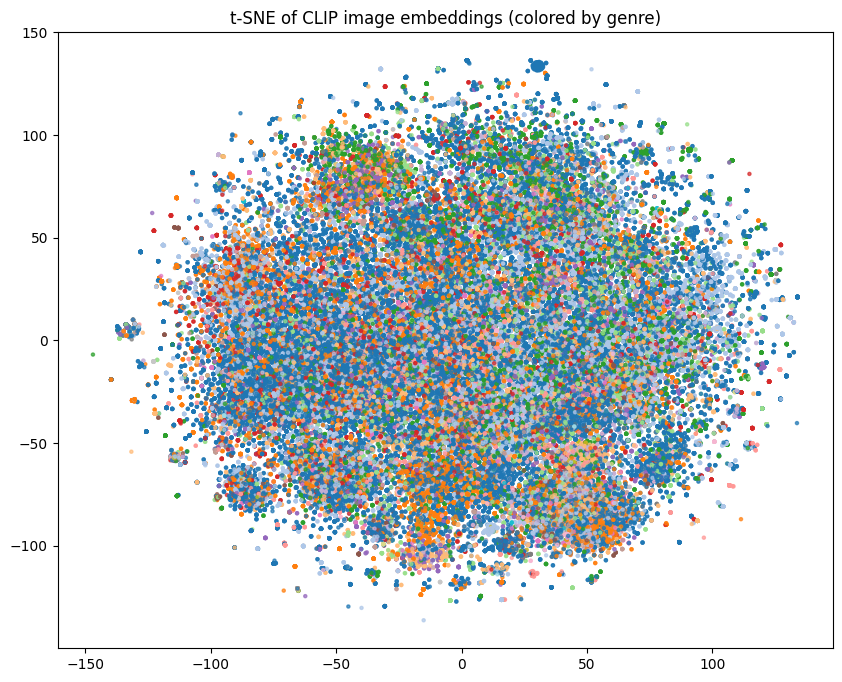

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Load embeddings (every row = one parent_asin with vector)
category = "CDs_and_Vinyl"
emb_df = pd.read_parquet("clip_img_emb_parent.parquet")
df = pd.read_parquet(f"reviews_with_img_emb_{category}.parquet")
print(len(emb_df), len(df))
emb_with_cat = emb_df.merge(
    df[["parent_asin", "categories"]], 
    on="parent_asin", 
    how="inner"
)

# Now extract embeddings + labels together
# lấy cái category cuối của cái mảng categories vì cái đầu đều là CD hoặc Vinyl
print(type(emb_with_cat["clip_img_emb"].values[0]), len(emb_with_cat))
X = np.stack(emb_with_cat["clip_img_emb"].values)
emb_with_cat["genre"] = emb_with_cat["categories"].apply(
    lambda x: x[-1] if len(x) > 0 else "Unknown"
)
labels = emb_with_cat["genre"]
print("Genre counts:", labels.value_counts().to_dict())

print("Shapes:", X.shape, len(labels))   
X_2d = TSNE(n_components=2, perplexity=30, metric="cosine", random_state=42).fit_transform(X)

plt.figure(figsize=(10,8))
plt.scatter(X_2d[:,0], X_2d[:,1],
            c=pd.factorize(labels)[0],
            cmap="tab20", s=5, alpha=0.7)
plt.title("t-SNE of CLIP image embeddings (colored by genre)")
plt.show()



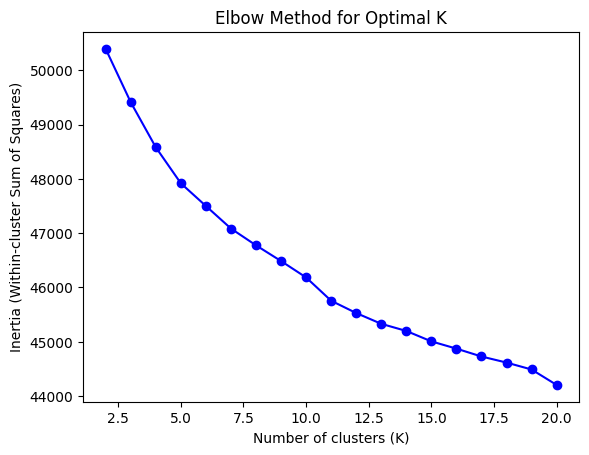

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 

wcss = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)   # X is your embedding matrix
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()





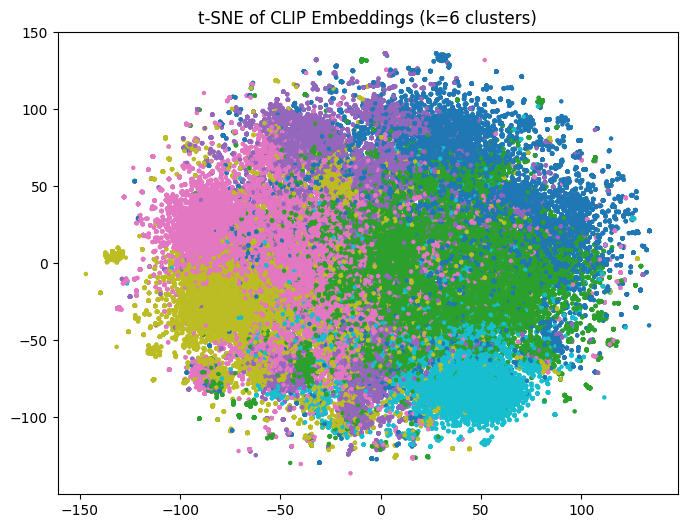

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap="tab10", s=5)
plt.title("t-SNE of CLIP Embeddings (k=6 clusters)")
plt.show()


## K = 6  la phe nha ae, vì ở đây đang test xem cái embedding của CLIP có thực sự OK k, thì k = 6 cho ra khá tốt vì cluster được ra tốt và thực sự cái model CLIP chạy oke, k=6 vì lấy dựa trên 2 cái method Elbow với Silhoutte ở trên


In [15]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import normalize

def to_text(x):
    """Convert scalars/lists to a single clean string."""
    if x is None:
        return ""
    if isinstance(x, list):
        # description often is a list of strings
        return " ".join([str(t) for t in x if t is not None])
    return str(x)

# Review-side text: user-written title_x + review body text
df["review_text"] = (
    df.get("title_x", "").apply(to_text).fillna("") + " " +
    df.get("text", "").apply(to_text).fillna("")
).str.strip()

# Meta-side text: product title_y + product description
df["meta_text"] = (
    df.get("title_y", "").apply(to_text).fillna("") + " " +
    df.get("description", "").apply(to_text).fillna("")
).str.strip()

model_text = SentenceTransformer("all-MiniLM-L6-v2")

review_corpus = df["review_text"].tolist()
meta_corpus   = df["meta_text"].tolist()

review_emb = model_text.encode(
    review_corpus, batch_size=64, show_progress_bar=True, convert_to_numpy=True
).astype("float32")

meta_emb = model_text.encode(
    meta_corpus, batch_size=64, show_progress_bar=True, convert_to_numpy=True
).astype("float32")

print("review_emb:", review_emb.shape, "meta_emb:", meta_emb.shape)

# Fuse review + meta into one text vector 
# can tune alpha; start with more weight on review text or the other way around.
alpha = 0.7  # weight on review text; (1-alpha) on meta
text_emb = normalize(alpha * review_emb + (1 - alpha) * meta_emb, axis=1)
df["review_text_emb"] = list(review_emb)
df["meta_text_emb"]   = list(meta_emb)
df["text_emb"]        = list(text_emb.astype("float32"))  # fused text emb


df.to_parquet(f"reviews_with_img_text_emb_{category}.parquet", index=False)
print("Saved:", f"reviews_with_img_text_emb_{category}.parquet")



# cái này là df có gồm luôn cái text_emb (là cái title_x đã được encode thành vector)


# cái này là để chuẩn hoá vector, tức là đưa vector về cùng 1 độ dài, để khi tính cosine similarity thì nó sẽ đúng hơn, hình dung nó như là chuyển 1 câu review về một vector có 384 chiều

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

review_emb: (100000, 384) meta_emb: (100000, 384)
Saved: reviews_with_img_text_emb_CDs_and_Vinyl.parquet


In [16]:
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Normalize the embeddings
E_txt = normalize(text_emb)   
# (N, D)

nbrs = NearestNeighbors(n_neighbors=10, metric="cosine").fit(E_txt)

def show_neighbors(idx, k=5):
    d, i = nbrs.kneighbors(E_txt[idx:idx+1], n_neighbors=k+1)
    return list(zip(i[0][1:], 1 - d[0][1:]))  # (neighbor_index, cosine_sim)

print(show_neighbors(123))


[(np.int64(83282), np.float32(0.78269565)), (np.int64(43184), np.float32(0.7723267)), (np.int64(11160), np.float32(0.76827514)), (np.int64(65724), np.float32(0.76233184)), (np.int64(25970), np.float32(0.75833845))]


## FAISS

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import faiss

# Load your image embedding df
emb_img = pd.read_parquet("clip_img_emb_parent.parquet")     # ['parent_asin','clip_img_emb']
# Load or build your text embedding df
emb_txt = pd.read_parquet("reviews_with_img_text_emb_CDs_and_Vinyl.parquet")        # ['parent_asin','title_emb']

# Ensure both keys are string type
emb_img['parent_asin'] = emb_img['parent_asin'].astype(str)
emb_txt['parent_asin'] = emb_txt['parent_asin'].astype(str)

# Merge to keep only rows that have BOTH embeddings
merged = emb_txt.merge(emb_img, on="parent_asin", how="inner")
merged = merged.rename(columns={''
    "clip_img_emb_y": "clip_img_emb",
    "title_x": "title_reviews",
    "title_y": "title_meta"
}).drop(columns=["clip_img_emb_x"], errors="ignore")


print("Merged:", merged.shape)
merged.to_parquet("reviews_with_img_text_emb_CDs_and_Vinyl.parquet", index=False)
merged.head()




Merged: (99893, 28)


,asin,parent_asin,user_id,rating,title_reviews,text,timestamp,helpful_vote,verified_purchase,images_x,...,categories,store,img_url,has_img_emb,review_text,meta_text,review_text_emb,meta_text_emb,text_emb,clip_img_emb
0,B0000019R2,B0000019R2,AEXKYJ25VORZRWYJ6WQHO7S33GRQ,5.0,Great Scott,Ok...am I missing something here? Scott Walker...,995566729000,8,False,[],...,"[CDs & Vinyl, Rock, Progressive, Progressive R...",Scott Walker Format: Audio CD,https://m.media-amazon.com/images/I/71KyxV0bZo...,False,Great Scott Ok...am I missing something here? ...,Tilt ['No Description AvailableNo Track Inform...,"[-0.026350165, 0.013469385, -0.04774539, -0.06...","[-0.021163987, -0.050409134, -0.013648441, -0....","[-0.02836945, -0.0065152245, -0.042925853, -0....","[-0.00479888916015625, 0.048492431640625, -0.0..."
1,B000GRTQSE,B000GRTQSE,AE6KSWUK2VIFSXP7ZCVXM54CHXIQ,5.0,Still way ahead,"""When I was a little kid in La Jolla, Californ...",1157278476000,11,False,[],...,"[CDs & Vinyl, Classic Rock, Album-Oriented Roc...",Bob Dylan Format: Audio CD,https://m.media-amazon.com/images/I/81veCi9zDX...,False,"Still way ahead ""When I was a little kid in La...",Modern Times ['Product Description'\n 'First n...,"[0.005149948, -0.039644253, -0.048656754, -0.0...","[-0.05492284, -0.06076527, -0.028247207, -0.05...","[-0.014855155, -0.053065117, -0.049087394, -0....","[0.0230560302734375, 0.037017822265625, 0.0489..."
2,B000GIXHIS,B000GIXHIS,AFRJSYXMELWV2BPENXWC3XNMC6ZA,4.0,Entertaining,"I generally dont get into screamo, but i would...",1156845285000,0,False,[],...,"[CDs & Vinyl, Indie & Alternative, Hardcore & ...",On the Last Day Format: Audio CD,https://m.media-amazon.com/images/I/61W5vMoPqJ...,False,Entertaining I generally dont get into screamo...,Meaning In The Static ['NEW Combo BLUWAVS CD a...,"[0.0076718964, -0.025650883, -0.04272849, -0.0...","[-0.080145545, -0.039894406, -0.06793061, 0.01...","[-0.023446582, -0.037573043, -0.063143946, -0....","[-0.0293426513671875, 0.0116424560546875, -0.0..."
3,B00EQJ0VNC,B00EQJ0VNC,AHVYBZENFQXUGGVCPLI3JZMBE3XA,4.0,I love it great background,I love it great background music,1435118556000,1,True,[],...,"[CDs & Vinyl, Folk, Contemporary Folk]",George Winston Format: Audio CD,https://m.media-amazon.com/images/I/51D2zzWBhu...,False,I love it great background I love it great ba...,Night Divides the Day: The Music of the Doors ...,"[-0.038403727, 0.07654132, 0.004754821, -0.127...","[0.0013325431, 0.013518795, 0.03503989, 0.0278...","[-0.03226324, 0.07021442, 0.016861264, -0.0984...","[-0.012847900390625, 0.00843048095703125, 0.04..."
4,B01D5KI7ME,B01D5KI7ME,AFLMZRV74ZVORT3K6JMQMMCB7XIA,3.0,Voices Drown by Music,The Alan Parsons Symphonic Project Live in Col...,1677527967251,0,False,[],...,"[CDs & Vinyl, International Music, South & Cen...",Alan Parsons Symphonic Project Format: Audio CD,https://m.media-amazon.com/images/I/71rIj7oBoX...,False,Voices Drown by Music The Alan Parsons Symphon...,"Live in Colombia [""To the great delight of Ala...","[0.05491869, -0.061455466, 0.005431556, -0.087...","[0.07897157, -0.079226516, 0.036448352, -0.026...","[0.070231356, -0.07548982, 0.016656931, -0.078...","[-0.0122833251953125, 0.0033779144287109375, 0..."


# khúc này là merge cả review với clip thành tensor để process

In [31]:

E_txt = np.stack(merged["text_emb"].values).astype("float32")
E_img = np.stack(merged["clip_img_emb"].values).astype("float32")
print("Shapes:", E_txt.shape, E_img.shape)
E_txt_n = normalize(E_txt, axis=1)
E_img_n = normalize(E_img, axis=1)

# fuse them
E_item_concat = normalize(np.concatenate([E_txt_n, E_img_n], axis=1), axis=1)
print("Fused shape:", E_item_concat.shape)
print(E_item_concat[0][:5])  # first 5 dims of first vector


Shapes: (99893, 384) (99893, 512)
Fused shape: (99893, 896)
[-0.02006023 -0.00460696 -0.03035316 -0.04394842  0.02163375]


In [32]:
E_item = E_item_concat
index = faiss.IndexFlatIP(E_item.shape[1])
index.add(E_item)
query_vec = E_item[535]  # pick any product vector
print("Query vector shape:", query_vec.shape)
sims, ids = index.search(query_vec[None, :], k=20)
print(sims,     ids)
for i, s in zip(ids[0], sims[0]):
    print(f"{merged.iloc[i]['text']} (score={s:.3f})")
E_item


Query vector shape: (896,)
[[0.9999998  0.7921714  0.7832881  0.76628137 0.69795936 0.6886
  0.6858434  0.6680968  0.65202045 0.64757204 0.63932866 0.6277021
  0.6259816  0.61275077 0.600111   0.5990857  0.5965606  0.5894672
  0.5883296  0.5879735 ]] [[  535 73847 49606 82179 85878 61370 16856  5157 16974 54316 99866 30366
  51103 63183 52666 83188  8442 90079 36527 68722]]
Brad Paisley has done it again! He is such a talented writer and performer; this CD has a wide variety of excellent songs. Especially enjoyed the numbers he shared with Mick Jagger and John Fogerty. Brad Paisley is so versatile, a great artist and a great person. If you are a BP Fan, you must buy this one! (score=1.000)
Brad always puts out a good album (score=0.792)
Love his music! (score=0.783)
wife and I (particularly my wife) are big fans. thanks for the new cd! arrived on time as expected. thanks! (score=0.766)
Terrific (score=0.698)
Brad is one of my favorite singers.  This CD has a lot of great songs on it.  

array([[-0.02006023, -0.00460696, -0.03035316, ...,  0.04191238,
        -0.00835336,  0.00239168],
       [-0.01050418, -0.0375227 , -0.03471003, ...,  0.03309486,
         0.02173603,  0.01717308],
       [-0.01657924, -0.02656816, -0.04464952, ...,  0.03923827,
         0.01721261, -0.01236718],
       ...,
       [ 0.00106143, -0.01273586, -0.03064566, ...,  0.03740227,
        -0.02589886,  0.02173346],
       [-0.05797349, -0.01659695,  0.01651864, ..., -0.00821396,
        -0.0052727 ,  0.00899111],
       [-0.04684909, -0.06862448, -0.02683985, ...,  0.00435275,
         0.01714115, -0.00493834]], shape=(99893, 896), dtype=float32)

In [23]:
import gradio as gr

def recommend(query):
    q_emb = model_text.encode([query])[0]
    q_emb = np.concatenate([q_emb, np.zeros(512)], axis=0)
    q_emb /= np.linalg.norm(q_emb)
    sims, ids = index.search(q_emb[None, :], k=20)
    return [merged.iloc[i]["img_url"] for i in ids[0]]

gr.Interface(fn=recommend, inputs="text", outputs=gr.Gallery()).launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio\flagged\dataset1.csv


## BLAIR

In [33]:
from transformers import AutoTokenizer, AutoModel
import torch, numpy as np

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
tok = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-large")
mdl = AutoModel.from_pretrained("hyp1231/blair-roberta-large").to(DEVICE).eval()

def blair_encode(texts, max_len=128, batch=64):
    vecs = []
    for i in range(0, len(texts), batch):
        batch_txt = texts[i:i+batch]
        enc = tok(batch_txt, padding=True, truncation=True, max_length=max_len, return_tensors="pt").to(DEVICE)
        with torch.no_grad():
            out = mdl(**enc).last_hidden_state[:,0,:]      # [CLS]
            out = torch.nn.functional.normalize(out, p=2, dim=1)
        vecs.append(out.cpu().numpy())
    return np.vstack(vecs)

# item-side embedding (once)
df["blair_item_emb"] = list(blair_encode(df["meta_text"].fillna("").tolist()))


In [35]:
import faiss, numpy as np

# Stack BLaIR item embeddings to a matrix
E_blair = np.vstack(df["blair_item_emb"].values).astype("float32")  # shape [N, D]

# FAISS index (IP assumes vectors are L2-normalized already)
index_blair = faiss.IndexFlatIP(E_blair.shape[1])
index_blair.add(E_blair)


In [ ]:

q_blair = blair_encode([user_text])[0].astype("float32")
sims_blair, ids_blair = index_blair.search(q_blair[None,:], k=200)  # get wider candidate pool
for i, s in zip(ids_blair[0][:10], sims_blair[0][:10]):
    print(f"{df.iloc[i]['text']} (score={s:.3f})")


I don't love every song out of these 19, but many are great. Plus, you are getting 19 songs for a very reasonable price!!! Fun! (score=0.932)
Good Songs..!!! (score=0.925)
This album rocks HARD. Seems like Joan is trying to prove a point. She may be getting older, like we all are, but she's not getting mellow. Just the opposite. The title track of this album is hook filled pop song and it gets louder from there. (score=0.925)
Like other music by Becvar, I listen to it over and over. I am a fan! (score=0.924)
I saw these guys in concert and loved the show.  I bought the album and it sounds great as well.  A really nice, clear sound - I hope they come back on tour again. (score=0.923)
Great album. Kept me calm during a stressful drive. (score=0.923)
Great album, great up and coming band! (score=0.923)
Great album from Jamestown Revival. We also bought the vinyl version at a concert. Both have great sound. It's a well recorded album, which isn't always the case. There isn't a bad track on

In [ ]:
def cosine(a, b): 
    return (a @ b) / (np.linalg.norm(a) * np.linalg.norm(b) + 1e-8)

def rerank_fusion(q_blair, q_text, q_img, cand_ids, alpha=0.6, beta=0.3, gamma=0.1):
    scores = []
    for i in cand_ids:
        s_blair = cosine(q_blair, df.at[i, "blair_item_emb"])
        s_text  = cosine(q_text,  df.at[i, "text_emb"])       if q_text is not None else 0.0
        s_img   = cosine(q_img,   df.at[i, "clip_img_emb"])   if (q_img is not None and df.at[i,"has_img_emb"]) else 0.0
        s_final = alpha*s_blair + beta*s_text + gamma*s_img
        scores.append((i, s_final))
    return [i for i,_ in sorted(scores, key=lambda x: x[1], reverse=True)]


In [6]:
user_text = "what about the beatles"
q_text = model_text.encode([user_text])[0].astype("float32")
final_ids = rerank_fusion(q_blair, q_text, None, ids_blair[0][:50], alpha=0.6, beta=0.3, gamma=0.1)[:20]
for i in final_ids:
    print(f"{df.iloc[i][['title_y','categories']]} (final score)")

NameError: name 'model_text' is not defined